In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scanpy as sc
import scvelo as scv
scv.settings.verbosity = 0
import unitvelo as utv

import warnings
warnings.filterwarnings("ignore")

(Running UniTVelo 0.2.5.2)
2024-07-25 12:02:06


# Mouse_Brain_10X

In [32]:
save_dir = "0722_183642"

path_result = "/data/nelkazwi/RNA_velo/Unitvelo_atac/E18_mouse_brain_10X/Mode_1/"
adata = sc.read(path_result+str(save_dir)+"/model_last.h5ad")
adata_atac = sc.read(path_result+str(save_dir)+"/model_last_atac.h5ad")

In [33]:
path = "/data/nelkazwi/RNA_velo/Multivelo_data/pp_2/"
adata_unv = sc.read_h5ad(path+"unitvelo_fit_data.h5ad")

In [34]:
adata.obsm['X_umap'] = adata_unv.obsm['X_umap']

  0%|          | 0/3433 [00:00<?, ?cells/s]

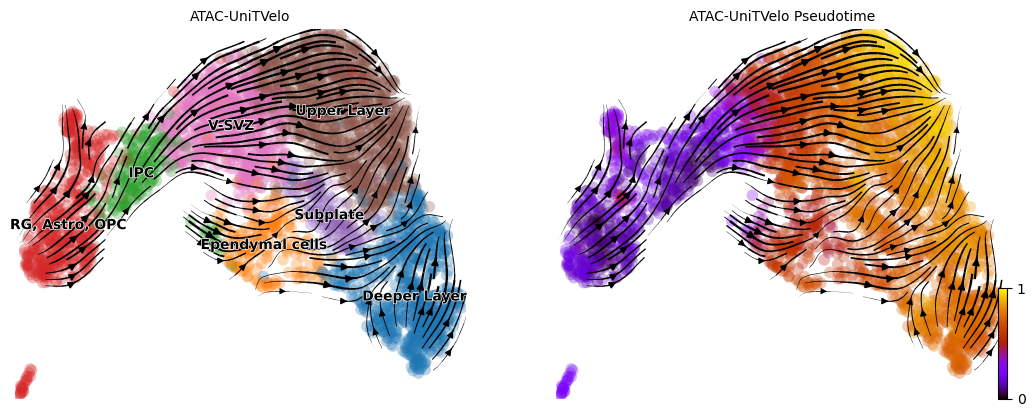

In [35]:
# sc.pp.neighbors(adata)
# sc.tl.umap(adata, n_components=2)
#sc.pl.umap(adata,color=["celltype","latent_time"],legend_loc = 'on data',color_map='gnuplot')
scv.tl.velocity_graph(adata)
scv.pl.velocity_embedding_stream(adata, color=['celltype','latent_time'], dpi=100, title=['ATAC-UniTVelo', 'ATAC-UniTVelo Pseudotime'],color_map='gnuplot')

In [5]:
cluster_edges = [
    ('Ependymal cells', 'Subplate'), 
    ('Deeper Layer', 'Upper Layer'), 
    ]

In [ ]:
scv.pp.neighbors(adata)
adata_velo = adata[:, adata.var.loc[adata.var['velocity_genes'] == True].index]
utv.evaluate(adata_velo, cluster_edges, "celltype", 'velocity', 'X_umap')

In [7]:
adata_unv.obsm['X_umap'] = adata.obsm['X_umap']

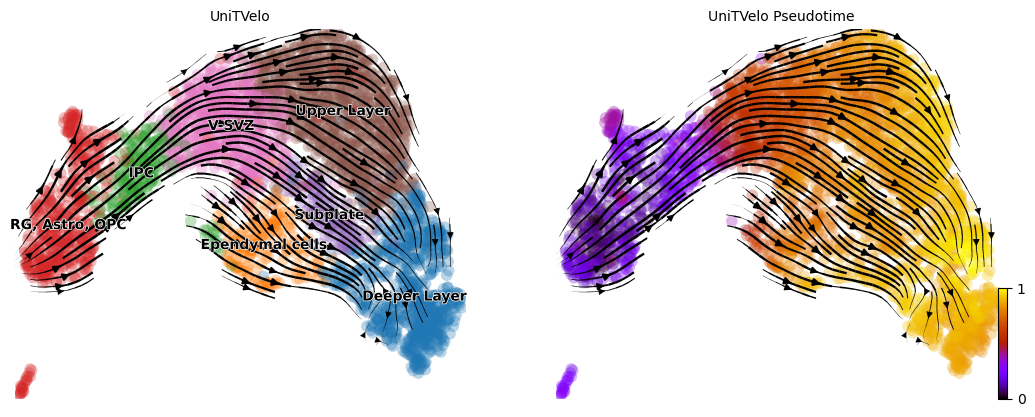

In [36]:
# sc.pp.neighbors(adata_unv)
# sc.tl.umap(adata_unv, n_components=2)
#sc.pl.umap(adata_unv,color=["celltype","latent_time"],legend_loc = 'on data',color_map='gnuplot')
#scv.tl.velocity_graph(adata)
scv.pl.velocity_embedding_stream(adata_unv, color=['celltype','latent_time'], dpi=100, title=['UniTVelo', 'UniTVelo Pseudotime'],color_map='gnuplot')

# Human_Cerebral_Cortex


In [19]:

save_dir = '0723_133015'
data_set = 'Human_Cerebral_Cortex/Mode_1'
path_result = '/data/nelkazwi/RNA_velo/Unitvelo_atac/'+data_set+'/checkpoints/VelocityDemo/'
adata = sc.read(path_result+str(save_dir)+"/model_last.h5ad")
adata_atac = sc.read(path_result+str(save_dir)+"/model_last_atac.h5ad")

In [5]:
save_dir = '0710_150802'
data_set = 'test'
path_result = "/data/nelkazwi/RNA_velo/Unitvelo_atac/"+data_set+'/checkpoints/VelocityDemo/'
adata = sc.read(path_result+str(save_dir)+"/model_last.h5ad")
adata_atac = sc.read(path_result+str(save_dir)+"/model_last_atac.h5ad")

In [24]:
path_unv = "/data/nelkazwi/RNA_velo/Unitvelo_atac/unitvelo_alone/Human_Cerebral_Cortex/"
adata_unv = sc.read(path_unv+'unitvelo_fit_data.h5ad')

In [25]:
adata.obsm["X_umap"] = adata_unv.obsm["X_umap"] 

  0%|          | 0/4667 [00:00<?, ?cells/s]

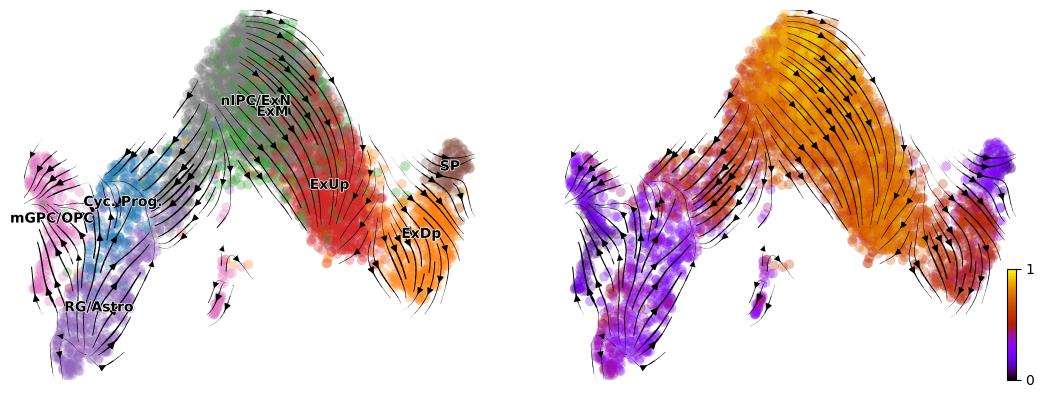

In [26]:
# sc.pp.neighbors(adata)
# sc.tl.umap(adata, n_components=2)
# # sc.pl.umap(adata,color=["celltype","latent_time"],legend_loc = 'on data',color_map='gnuplot')
scv.tl.velocity_graph(adata)
scv.pl.velocity_embedding_stream(adata, color=['celltype','latent_time'], dpi=100, title='',color_map='gnuplot')

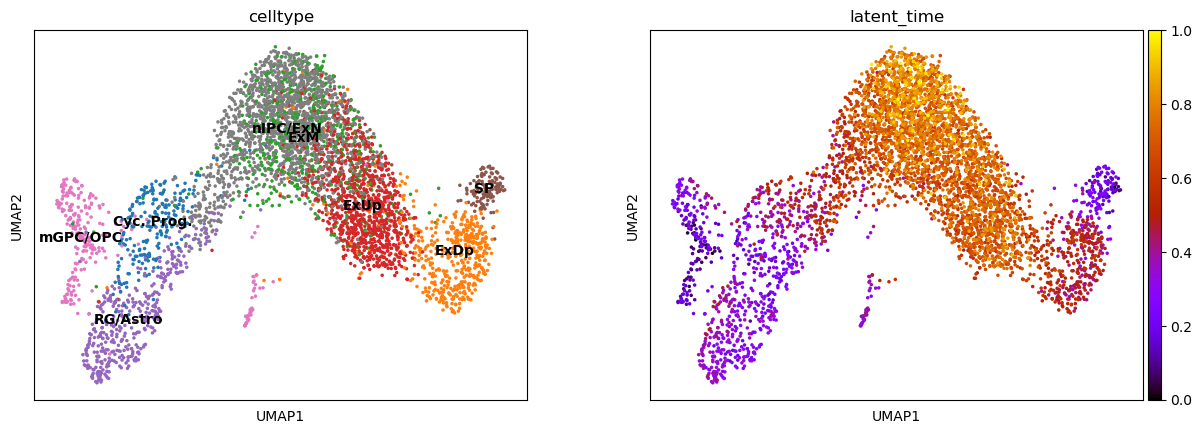

In [27]:
sc.pl.umap(adata,color=["celltype","latent_time"],legend_loc = 'on data',color_map='gnuplot')

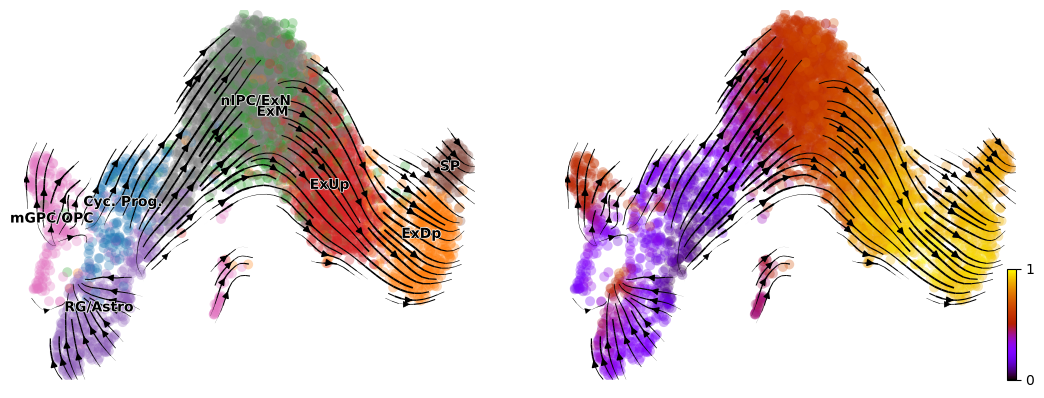

In [22]:
scv.pl.velocity_embedding_stream(adata_unv, color=['celltype','latent_time'], dpi=100, title='',color_map='gnuplot')

In [23]:
dataset = '/data/nelkazwi/RNA_velo/Unitvelo_atac/Human_Cerebral_Cortex/RNA_data.h5ad'
label = 'celltype'
exp_metrics = {}
velo_config = utv.config.Configuration()
velo_config.R2_ADJUST = True
#velo_config.IROOT = 'IPC'
velo_config.FIT_OPTION = '1'
velo_config.AGENES_R2 = 1
velo_config.MAX_ITER = 5000
adata = utv.run_model(dataset, label, config_file=velo_config)
path = "/data/nelkazwi/RNA_velo/Unitvelo_atac/unitvelo_alone/Human_Cerebral_Cortex/"
adata.write_h5ad(path+"unitvelo_fit_data_5000.h5ad")
#adata_unv.write( "/data/nelkazwi/RNA_velo/Unitvelo_atac/unitvelo_alone/Human_Cerebral_Cortex/unitvelo_fit_data.h5ad")

In [39]:
import json
from pathlib import Path
from collections import OrderedDict
fname = Path('/data/nelkazwi/code/UniTVelo-ATAC/unitvelo/config/config_main_10X_mouse_brain.json')
with fname.open('rt') as handle:
        data = json.load(handle, object_hook=OrderedDict)

In [3]:
df = adata_atac.var
df

,chrom,chromStart,chromEnd
chr1:4914588-4914730,chr1,4914588,4914730
chr1:4923057-4923478,chr1,4923057,4923478
chr1:4926231-4926701,chr1,4926231,4926701
chr1:4969719-4971621,chr1,4969719,4971621
chr1:5012780-5013257,chr1,5012780,5013257
...,...,...,...
chrY:90800303-90800705,chrY,90800303,90800705
chrY:90801406-90801781,chrY,90801406,90801781
chrY:90804581-90805542,chrY,90804581,90805542
chrY:90808563-90809244,chrY,90808563,90809244


In [4]:
nregions = adata_atac.X.shape[1]
adata_atac.var['region_number'] = np.arange(0, nregions)
adata_atac.var

,chrom,chromStart,chromEnd,region_number
chr1:4914588-4914730,chr1,4914588,4914730,0
chr1:4923057-4923478,chr1,4923057,4923478,1
chr1:4926231-4926701,chr1,4926231,4926701,2
chr1:4969719-4971621,chr1,4969719,4971621,3
chr1:5012780-5013257,chr1,5012780,5013257,4
...,...,...,...,...
chrY:90800303-90800705,chrY,90800303,90800705,25869
chrY:90801406-90801781,chrY,90801406,90801781,25870
chrY:90804581-90805542,chrY,90804581,90805542,25871
chrY:90808563-90809244,chrY,90808563,90809244,25872


# HSPC

In [ ]:
dataset = '/data/nelkazwi/RNA_velo/Unitvelo_atac/HSPC/RNA_data.h5ad'
label = 'celltype'
exp_metrics = {}
velo_config = utv.config.Configuration()
velo_config.R2_ADJUST = True
#velo_config.IROOT = 'IPC'
velo_config.FIT_OPTION = '1'
velo_config.AGENES_R2 = 1
velo_config.MAX_ITER = 10000
adata = utv.run_model(dataset, label, config_file=velo_config)
path = "/data/nelkazwi/RNA_velo/Unitvelo_atac/unitvelo_alone/HSPC/"
adata.write_h5ad(path+"unitvelo_fit_data.h5ad")

In [38]:
save_dir = '0724_103433'
data_set = 'HSPC/Mode_1'
path_result = '/data/nelkazwi/RNA_velo/Unitvelo_atac/'+data_set+'/checkpoints/VelocityDemo/'
adata = sc.read(path_result+str(save_dir)+"/model_last.h5ad")
adata_atac = sc.read(path_result+str(save_dir)+"/model_last_atac.h5ad")

In [39]:
path = '/data/nelkazwi/RNA_velo/Unitvelo_atac/HSPC/'
adata_mv = sc.read(path + "adata_postpro.h5ad")

In [ ]:
import matplotlib.colors as mcolors
num_colors = 11
cmap = plt.get_cmap('tab10', num_colors)

# Get a list of colors from the colormap
colors = [cmap(i) for i in range(num_colors)]

# Convert RGBA colors to hex
colors = [mcolors.to_hex(color) for color in colors]

# Filter out the gray color (#7f7f7f)
colors = [color for color in colors if color != '#7f7f7f']



# Get color names if available, otherwise use the hex codes
color_names = [mcolors.cnames[color] if color in mcolors.cnames else color for color in colors]

# Convert the list of color names to a single string
color_names_string = ', '.join(color_names)


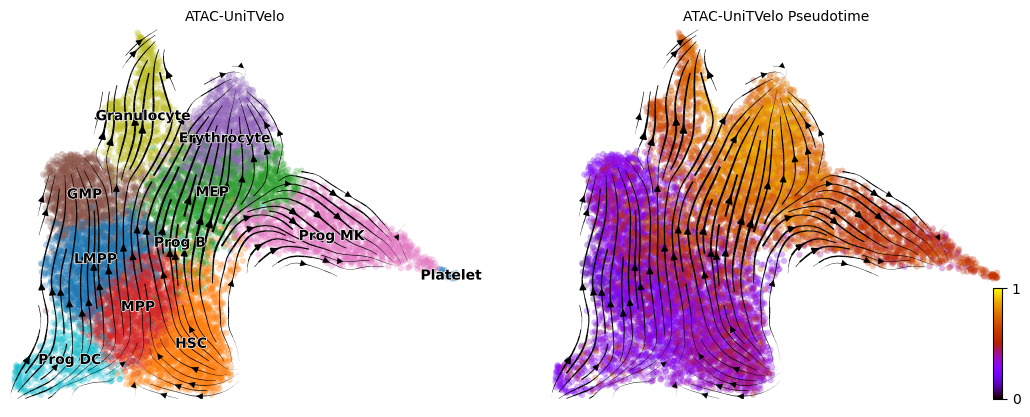

In [90]:
# adata.obsm["X_umap"] = adata_mv.obsm["X_umap"] 
# scv.tl.velocity_graph(adata)
scv.pl.velocity_embedding_stream(adata, color=['celltype','latent_time'], dpi=100, title=['ATAC-UniTVelo', 'ATAC-UniTVelo Pseudotime'],
                                 palette = colors, color_map='gnuplot')

In [91]:
path = "/data/nelkazwi/RNA_velo/Unitvelo_atac/unitvelo_alone/HSPC/"
adata_unv = sc.read(path+'unitvelo_fit_data.h5ad')

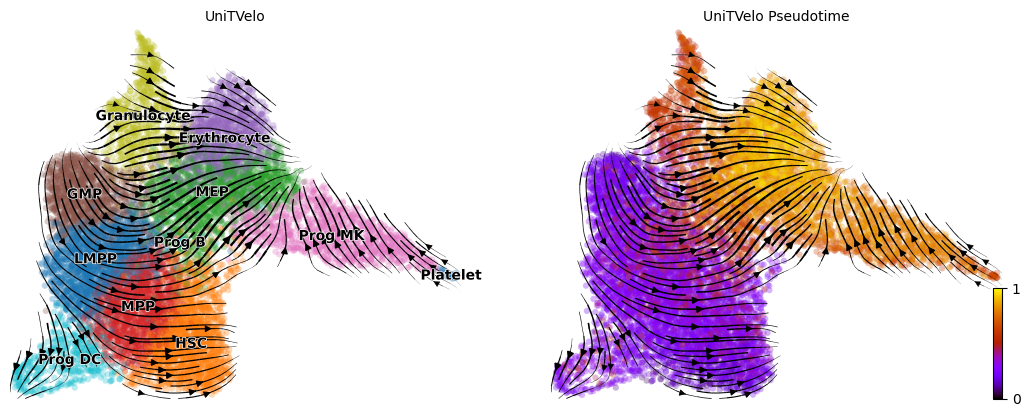

In [94]:
adata_unv.obsm["X_umap"] = adata_mv.obsm["X_umap"] 
#scv.tl.velocity_graph(adata_unv)
scv.pl.velocity_embedding_stream(adata_unv, color=['celltype','latent_time'], dpi=100, title=['UniTVelo', 'UniTVelo Pseudotime'],
                                 palette = colors, color_map='gnuplot')